## Forecasting fireforest using Neural Network 

In [130]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [131]:
# Reading the dataset
df = pd.read_csv(r"C:\Users\Suraj\Dropbox\My PC (DESKTOP-LAM9SRV)\Desktop\Assignment\forestfires.csv")

In [132]:
#Bottom data 
df.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [133]:
#Row*coloumns 
df.shape

(517, 31)

In [134]:
#checking the Null values 
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [135]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
#columns of Dataset 
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [137]:
#showing unique values 
df.size_category.unique()

array(['small', 'large'], dtype=object)

In [138]:
#count of unique values 
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [139]:
#for understanding self(ignore) 
df.monthnov.unique()

array([0, 1], dtype=int64)

In [140]:
## Creating dummies var for columns month,day,size_category with dropping first columns
df2=pd.get_dummies(df,columns={'month','day','size_category'},drop_first=True)

In [141]:
df2.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category_small
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,1,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,1,0,0,1,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,1


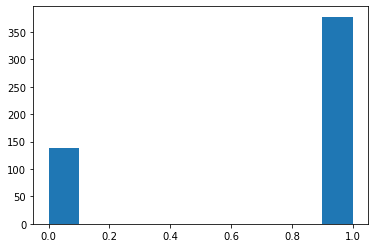

In [142]:
#Ploting of histogram & knowing size category i.e. 0 - large, 1-small
plt.hist(df2.size_category_small)
plt.show()

In [143]:
#coorelation of columns
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


In [144]:
# Using Normalization function (it is used to lead our model more accurate)(0-1)
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [145]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df2.iloc[:,:])
df_norm.tail(10)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category_small
507,0.932903,0.571330,0.873343,0.126560,0.762058,0.305882,0.355556,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
508,0.932903,0.571330,0.873343,0.126560,0.762058,0.305882,0.355556,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
509,0.932903,0.571330,0.873343,0.126560,0.607717,0.658824,0.800000,0.21875,0.001989,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
510,0.932903,0.571330,0.873343,0.126560,0.514469,0.552941,0.555556,0.00000,0.000394,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
511,0.811613,0.191592,0.771315,0.033868,0.823151,0.235294,0.255556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
516,0.784516,0.006547,0.115867,0.019608,0.308682,0.188235,0.455556,0.00000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [146]:
# Feature_col=data.drop(['size_category_small'],axis=1)
# Output_target=['size_category_small']
X = df2.drop(['size_category_small'],axis=1)
Y = df2['size_category_small']

In [147]:
# Creating model
model = Sequential()

# Geting number of columns in training data
n_cols = X.shape[1]

# Adding model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [148]:
# number of columns 
n_cols

45

In [149]:
# Compiling model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [150]:
from keras.callbacks import EarlyStopping
# Setting early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
# Training model
model.fit(X, Y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

Epoch 1/30
13/13 [==============================] - 6s 49ms/step - loss: 11101.2139 - val_loss: 6721.4175
Epoch 2/30
13/13 [==============================] - 0s 22ms/step - loss: 4888.5830 - val_loss: 2334.9175
Epoch 3/30
13/13 [==============================] - 0s 20ms/step - loss: 1981.7417 - val_loss: 481.6964
Epoch 4/30
13/13 [==============================] - 0s 15ms/step - loss: 566.1860 - val_loss: 73.5699
Epoch 5/30
13/13 [==============================] - 0s 14ms/step - loss: 107.8009 - val_loss: 141.4293
Epoch 6/30
13/13 [==============================] - 0s 15ms/step - loss: 67.9809 - val_loss: 159.1580
Epoch 7/30
13/13 [==============================] - 0s 14ms/step - loss: 58.7011 - val_loss: 108.4516


In [151]:
# Training a new model on the same data to show the effect of increasing model capacity

# Creating model
model_mc = Sequential()

# Adding model layers
model_mc.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(1))

# Compiling model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')
# Training model
model_mc.fit(X, Y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

Epoch 1/30
13/13 [==============================] - 2s 46ms/step - loss: 951.1115 - val_loss: 121.4656
Epoch 2/30
13/13 [==============================] - 0s 19ms/step - loss: 83.4045 - val_loss: 83.6145
Epoch 3/30
13/13 [==============================] - 0s 19ms/step - loss: 21.3357 - val_loss: 21.8355
Epoch 4/30
13/13 [==============================] - 0s 18ms/step - loss: 5.7614 - val_loss: 5.9553
Epoch 5/30
13/13 [==============================] - 0s 19ms/step - loss: 1.6460 - val_loss: 1.6282
Epoch 6/30
13/13 [==============================] - 0s 18ms/step - loss: 0.9636 - val_loss: 1.1143
Epoch 7/30
13/13 [==============================] - 0s 18ms/step - loss: 0.3308 - val_loss: 1.1866
Epoch 8/30
13/13 [==============================] - 0s 18ms/step - loss: 0.3093 - val_loss: 0.5796
Epoch 9/30
13/13 [==============================] - 0s 19ms/step - loss: 0.1894 - val_loss: 0.5448
Epoch 10/30
13/13 [==============================] - 0s 18ms/step - loss: 0.1610 - val_loss: 0.5619
E